# Projeto #3 - Analisando dados oficiais sobre a Covid19

## 1) (5%) Qual a base escolhida e qual seu interesse nela (podem ser mais de uma)? Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).
Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você. Quais são as características básicas da base?
Ex: Estou trabalhando com o histório de vendas de um varejo e uma outra base do mesmo varejista das suas campanhas de marketing realizadas em veiculos de comunicação.

### Base de dados escolhida

A base escolhida é um conjunto de dados cruzados a partir de dados oficiais sob responsabilidade das Secretarias de Saúde dos Estados, bem como do IBGE - Instituto Brasileiro de Geografia e Estatística e informações publicadas pelos Cartórios Brasileiros referente a óbitos.

Fontes: 

Fonte: Secretarias de Saúde das Unidades Federativas, dados tratados por Álvaro Justen e colaboradores/Brasil.IO. 

Brasil.IO: boletins epidemiológicos da COVID-19 por município por dia, disponível em: https://brasil.io/dataset/covid19/ (última atualização:  09 de Agosto de 2020 às 19:57:27, acesso em 10 de Agosto de 2020 12:00).

Portal da Transparência do Registro Civil: Painel COVID Registral, registro de óbitos por doenças respiratórias, disponível em: https://transparencia.registrocivil.org.br/registral-covid (Última atualização 10 de Agosto de 2020 04:50, acesso em 10 de Agosto de 2020 12:00).

Estimativas de população publicadas no Diário Oficial da União pelo Instituto Brasileiro de Geografia e Estatística - IBGE, disponível em https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html (última atualização: 1º de julho de 2019, acesso em 17 de Maio de 2020 21:00).



## 2) (5%) Que tipo de problema podemos solucionar com ela? Liste ao menos 3 hipóteses sobre seus dados, caso sua base seja muito restrita converse com os professores antes de seguir.
Quais são suas hipoteses sobre os dados? O que vc espera descobrir com esse estudo?
Ex: Hipoteses válidas seriam:
As pessoas fazem mais compras nos dias utéis ou finais de semana?
Existe diferença entre o padrão de compra de segunda ou terça feira?
O horário de pico influencia no padrão de compra dos clientes?
Quais produtos são comprados mais juntos? Existe diferença se observarmos a idade do cliente?
Qual o efeito de uma campanha de marketing nas vendas?

### Hipóteses
Hipótese 1: A pandemia trouxe um aumento no número de óbitos no Brasil ou houve queda/estabilização de outras causas de mortes?
Hipótese 2: É possível detectar subnotificação de óbitos que seriam mais provavelmente associados à Covid19?
Hipótese 3: É psosível prever quando haverá redução no número de óbitos por Covid19 significativamente?


## 3) (20%) Preparação de dados
Hora de deixar a base perfeita para se trabalhar. Limpe os dados, integre com outras fontes e transforme-o para ficar pronto para se trabalhar! No fim, mostre um antes e depois de seu dataframe.

# Datasets

## Caso (caso.csv)

Essa tabela tem apenas os casos relatados pelos boletins das Secretarias Estaduais de Saúde e, por isso, não possui valores para todos os municípios e todas as datas - essa é uma "tabela canônica", que reflete o que foi publicado. Necessário conferir se os dados apresentados correspondem às fontes citadas. As análises poderão ocorrer nesta tabela apenas, pois consolida os dados de outras fontes.

Colunas:

- date: data de coleta dos dados no formato YYYY-MM-DD.
- state: sigla da unidade federativa, exemplo: SP.
- city: nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também).
- place_type: tipo de local que esse registro descreve, pode ser city ou state.
- order_for_place: número que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.
- is_last: campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False (caso filtre por esse campo, use is_last=True ou is_last=False, não use o valor em minúsculas).
- city_ibge_code: código IBGE do local.
- confirmed: número de casos confirmados.
- deaths: número de mortes.
- estimated_population_2019: população estimada para esse município/estado em 2019, segundo o IBGE
- confirmed_per_100k_inhabitants: número de casos confirmados por 100.000 habitantes.
death_rate: taxa de mortalidade (mortes / confirmados).

## Boletim (boletim.csv)

Tabela que lista os boletins publicados pelas Secretarias Estaduais de Saúde. Pode aparecer mais de um para a mesma data e podem existir dias em que as SES não publicam boletins.

Colunas:

- date: data do boletim no formato YYYY-MM-DD.
- state: sigla da unidade federativa, exemplo: SP.
- url: link para o boletim
- notes: observações sobre esse boletim

## Caso Full (caso_full.csv)

Tabela gerada a partir da tabela caso, que possui um registro por município (+ Importados/Indefinidos) e estado para cada data disponível; nos casos em que um boletim não foi divulgado naquele dia, é copiado o dado do último dia disponível e a coluna is_repeated fica com o valor True.

Colunas:

- city: nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também).
- city_ibge_code: código IBGE do local.
- date: data de coleta dos dados no formato YYYY-MM-DD.
- epidemiological_week: número da semana epidemiológica.
estimated_population_2019: população estimada para esse município/estado em 2019, segundo o IBGE (acesse o script que faz o download e conversão dos dados de população).
- is_last: campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False (caso filtre por esse campo, use is_last=True ou is_last=False, não use o valor em minúsculas).
- is_repeated: campo pré-computado que diz se as informações nesse registro foram publicadas pela Secretaria Estadual de Saúde no dia date ou se o dado é repetido do último dia em que o dado está disponível (igual ou anterior a date). Isso ocorre pois nem todas as secretarias publicam boletins todos os dias. Veja também o campo last_available_date.
last_available_confirmed: número de casos confirmados do último dia disponível igual ou anterior à data date.
last_available_confirmed_per_100k_inhabitants: número de casos confirmados por 100.000 habitantes do último dia disponível igual ou anterior à data date.
- last_available_date: data da qual o dado se refere.
last_available_death_rate: taxa de mortalidade (mortes / confirmados) do último dia disponível igual ou anterior à data date.
last_available_deaths: número de mortes do último dia disponível igual ou anterior à data date.
- order_for_place: número que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.
- place_type: tipo de local que esse registro descreve, pode ser city ou state.
- state: sigla da unidade federativa, exemplo: SP.
- new_confirmed: número de novos casos confirmados desde o último dia (note que caso is_repeated seja True, esse valor sempre será 0 e que esse valor pode ser negativo caso a SES remaneje os casos desse município para outro).
- new_deaths: número de novos óbitos desde o último dia (note que caso is_repeated seja True, esse valor sempre será 0 e que esse valor pode ser negativo caso a SES remaneje os casos desse município para outro).


## Óbito cartório (obito_cartorio.csv)

Essa tabela contém dados de óbitos registrados nos cartórios e disponíveis no Portal da Transparência do Registro Civil.

DADOS INCOMPLETOS: os cartórios podem demorar algumas semanas para consolidar os dados e, portanto, os dados dos 14 últimos dias (pelo menos) são incompletos e serão atualizados no futuro. Caso queira ter certeza de que está trabalhando com números finais (ou quase finais), utilize dados anteriores a 30 dias da data de atualização desse dataset.


- deaths_total_2019: Quantidade de óbitos totais para o estado state acumulados no ano de 2019 (de 1 de janeiro de 2019 a dia/mês de date em 2019).
- deaths_total_2020: Quantidade de óbitos totais para o estado state acumulados no ano de 2020 (de 1 de janeiro de 2020 a date).
- new_deaths_total_2019: Quantidade de óbitos totais para o estado state ocorridos no dia/mês de date, porém em 2019 (de 1 de janeiro de 2019 a dia/mês de date em 2019).
- deaths_covid19: Quantidade de óbitos em decorrência de suspeita ou confirmação de covid19 para o estado state acumulados no ano de 2020 (de 1 de janeiro de 2020 a date).
- new_deaths_total_2020: Quantidade de óbitos totais para o estado state ocorridos na data date (em 2020).
- deaths_indeterminate_2019: Quantidade de óbitos de motivo indeterminado para o estado state acumulados no ano de 2019 (de 1 de janeiro de 2019 a dia/mês de date em 2019).
- deaths_indeterminate_2020: Quantidade de óbitos de motivo indeterminado para o estado state acumulados no ano de 2020 (de 1 de janeiro de 2020 a date).
- deaths_others_2019: Quantidade de óbitos em decorrência de outros motivos para o estado state acumulados no ano de 2019 (de 1 de janeiro de 2019 a dia/mês de date em 2019).
- deaths_others_2020: Quantidade de óbitos em decorrência de outros motivos para o estado state acumulados no ano de 2020 (de 1 de janeiro de 2020 a date).
- deaths_pneumonia_2019: Quantidade de óbitos em decorrência de pneumonia para o estado state acumulados no ano de 2019 (de 1 de janeiro de 2019 a dia/mês de date em 2019).
- deaths_pneumonia_2020: Quantidade de óbitos em decorrência de pneumonia para o estado state acumulados no ano de 2020 (de 1 de janeiro de 2020 a date).
- deaths_respiratory_failure_2019: Quantidade de óbitos em decorrência de insuficiência respiratória para o estado state acumulados no ano de 2019 (de 1 de janeiro de 2019 a dia/mês de date em 2019).
- deaths_respiratory_failure_2020: Quantidade de óbitos em decorrência de insuficiência respiratória para o estado state acumulados no ano de 2020 (de 1 de janeiro de 2020 a date).
- deaths_sars_2019: Quantidade de óbitos em decorrência de SRAG para o estado state acumulados no ano de 2019 (de 1 de janeiro de 2019 a dia/mês de date em 2019).
- deaths_sars_2020: Quantidade de óbitos em decorrência de SRAG para o estado state acumulados no ano de 2020 (de 1 de janeiro de 2020 a date).
- deaths_septicemia_2019: Quantidade de óbitos em decorrência de septicemia para o estado state acumulados no ano de 2019 (de 1 de janeiro de 2019 a dia/mês de date em 2019).
- deaths_septicemia_2020: Quantidade de óbitos em decorrência de septicemia para o estado state acumulados no ano de 2020 (de 1 de janeiro de 2020 a date).
- new_deaths_covid19: Quantidade de óbitos em decorrência de suspeita ou confirmação de covid19 para o estado state ocorridos na data date (em 2020).
- new_deaths_indeterminate_2019: Quantidade de óbitos de motivo indeterminado para o estado state ocorridos no dia/mês de date, porém em 2019 (de 1 de janeiro de 2019 a dia/mês de date em 2019).
- new_deaths_indeterminate_2020: Quantidade de óbitos de motivo indeterminado para o estado state ocorridos na data date (em 2020).
- new_deaths_others_2019: Quantidade de óbitos em decorrência de outros motivos para o estado state ocorridos no dia/mês de date, porém em 2019 (de 1 de janeiro de 2019 a dia/mês de date em 2019).
- new_deaths_others_2020: Quantidade de óbitos em decorrência de outros motivos para o estado state ocorridos na data date (em 2020).
- new_deaths_pneumonia_2019: Quantidade de óbitos em decorrência de pneumonia para o estado state ocorridos no dia/mês de date, porém em 2019 (de 1 de janeiro de 2019 a dia/mês de date em 2019).
- new_deaths_pneumonia_2020: Quantidade de óbitos em decorrência de pneumonia para o estado state ocorridos na data date (em 2020).
- new_deaths_respiratory_failure_2019: Quantidade de óbitos em decorrência de insuficiência respiratória para o estado state ocorridos no dia/mês de date, porém em 2019 (de 1 de janeiro de 2019 a dia/mês de date em 2019).
- new_deaths_respiratory_failure_2020: Quantidade de óbitos em decorrência de insuficiência respiratória para o estado state ocorridos na data date (em 2020).
- new_deaths_sars_2019: Quantidade de óbitos em decorrência de SRAG para o estado state ocorridos no dia/mês de date, porém em 2019 (de 1 de janeiro de 2019 a dia/mês de date em 2019).
- new_deaths_sars_2020: Quantidade de óbitos em decorrência de SRAG para o estado state ocorridos na data date (em 2020).
- new_deaths_septicemia_2019: Quantidade de óbitos em decorrência de septicemia para o estado state ocorridos no dia/mês de date, porém em 2019 (de 1 de janeiro de 2019 a dia/mês de date em 2019).
- new_deaths_septicemia_2020: Quantidade de óbitos em decorrência de septicemia para o estado state ocorridos na data date (em 2020).


# Estimativa DOU 2019 (estimativa_dou_2019.xls)

Planilha publicada pelo IBGE com estimativas para a população residente nos municípios brasileiros com data de referência em 1/7/2019. O conteúdo desta planilha foi transformado em CSV com a seguintes colunas:
- CODMUNIC: Código do município no IBGE 
- UF: sigla da unidade federativa, exemplo: SP.
- CODDUF: Código da UF no IBGE
- MUNICIPIO: Nome do município 
- POPULACAO: Estimativa de população, dado alvo

### Importação dos dados para banco MYSQL InnoDB

Devido à quantidade de dados e os cruzamentos de informações necessárias a análise dos dados, preferi importar todas as tabelas para um banco de dados MySQL por ter maior familiaridade com SQL nativo e ganhar tempo na preparação dos dados.

As fontes de dados a serem importadas originais tem:
- caso.csv: 490.200 linhas
- caso_full.csv: 509.888 linhas 
- boletim.csv: 4.922 linhas 
- obito_cartorio.csv: 9.881 linhas 
- estimativa_dou_2019.xls: 27.850 linhas

*Total*: 1.042.741 linhas 

O processo foi bem simples, importando todos os CSV's disponíveis para a base MySQL.

Segue script utilizado e algumas explicações:

```
    CREATE DATABASE covid19;

    CREATE TABLE `caso` (
        `id` int(11) NOT NULL AUTO_INCREMENT,
        `date` date NOT NULL,
        `state` varchar(2) NOT NULL,
        `city` varchar(255) DEFAULT NULL,
        `place_type` enum('city','state') NOT NULL,
        `confirmed` int(11) NOT NULL,
        `deaths` int(11) NOT NULL DEFAULT '0',
        `order_for_place` int(11) NOT NULL,
        `is_last` int(1) NOT NULL DEFAULT '0',
        `estimated_population_2019` int(11) NOT NULL,
        `city_ibge_code` int(11) NOT NULL,
        `confirmed_per_100k_inhabitants` float(16,5) NOT NULL,
        `death_rate` float(16,4) NOT NULL,
    PRIMARY KEY (`id`)
    KEY `state` (`state`),
    KEY `city` (`city`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;


LOAD DATA LOCAL INFILE '/tmp/caso.csv'
INTO TABLE caso 
    FIELDS TERMINATED BY ',' OPTIONALLY ENCLOSED BY '"'
    LINES TERMINATED BY '\n'
    IGNORE 1 LINES
    (date, state, city, place_type, confirmed, deaths, order_for_place, @is_last, estimated_population_2019, city_ibge_code, confirmed_per_100k_inhabitants, death_rate) 
    SET 
       is_last  = IF(is_last='True',1,0);  

```                  

Observações: 

- Criei a estrutura da tabela para já iniciar um pré-processamento e tratar os dados adequadamente. 
- Atribuí os tipos corretos e fiz um cast em "is_last" para True/False ser interpretado como 1/0 na leitura do CSV.
- A utilização de LOAD DATA é sensivelmente mais rápido que outros métodos, além de ser muito mais fácil de descrever. No ambiente local do meu notebook, processou em 4,044s os 490.200 registros importados da tabela caso, por exemplo.
- Criei uma chave primária fictícia com um ID autoincrement
- Criei alguns índices em campos que certamente serão utilizados nos filtros: state e city.
- Não permiti valores NULL, exceto em city, que para os registros que referem-se ao estado, pode ser NULL.
- A coluna place_type só pode ter os valores "city" ou "state", então foi usado o tipo enum que limita os valores possíveis
- As demais tabelas abaixo são auxiliares para conferir se os dados disponibilizados nesta tabela principal estão corretos e seguem os mesmos princípios.

```
CREATE TABLE `caso_full` (
  `id` int(11) NOT NULL AUTO_INCREMENT,
  `city` varchar(255) DEFAULT NULL,
  `city_ibge_code` varchar(255) NOT NULL,
  `date` date NOT NULL,
  `epidemiological_week` int(11) NOT NULL,
  `estimated_population_2019` int(11) NOT NULL,
  `is_last` int(1) NOT NULL,
  `is_repeated` int(1) NOT NULL,
  `last_available_confirmed` int(11) NOT NULL,
  `last_available_confirmed_per_100k_inhabitants` float(16,5) NOT NULL,
  `last_available_date` date NOT NULL,
  `last_available_death_rate` varchar(255) NOT NULL,
  `last_available_deaths` float(16,2) NOT NULL,
  `order_for_place` int(11) NOT NULL,
  `place_type` enum('city','state') NOT NULL,
  `state` varchar(2) NOT NULL,
  `new_confirmed` int(11) NOT NULL,
  `new_deaths` int(11) NOT NULL,
  PRIMARY KEY (`id`)
  KEY `state` (`state`),
  KEY `city` (`city`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;

LOAD DATA LOCAL INFILE '/tmp/caso_full.csv'
INTO TABLE caso_full 
  FIELDS TERMINATED BY ',' ENCLOSED BY '"'
  LINES TERMINATED BY '\n' 
  IGNORE 1 LINES
  (@city,city_ibge_code,date,epidemiological_week,estimated_population_2019,@is_last,@is_repeated,last_available_confirmed,
  last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,
  order_for_place,place_type,state,new_confirmed,new_deaths) 
  SET 
    city        = NULLIF(city, 0),
    is_last     = IF(is_last='True',1,0),
    is_repeated = IF(is_repeated='True',1,0);

```


```
CREATE TABLE `boletim` (
  `date` date NOT NULL,
  `id` int(11) NOT NULL AUTO_INCREMENT,
  `notes` varchar(255) DEFAULT NULL,
  `state` varchar(2) DEFAULT NULL,
  `url` varchar(255) DEFAULT NULL,
  PRIMARY KEY (`id`)
) ENGINE=InnoDB  DEFAULT CHARSET=utf8;

LOAD DATA LOCAL INFILE '/tmp/boletim.csv'
INTO TABLE boletim 
                FIELDS TERMINATED BY ',' ENCLOSED BY '"'
                LINES TERMINATED BY '\n'
                IGNORE 1 LINES
                (date,notes,state,url) 
                SET 
                notes = NULLIF(notes, 0);
```                


```
CREATE TABLE `obito_cartorio` (
  `id` int(11) NOT NULL AUTO_INCREMENT,
  `date` date NOT NULL,
  `state` varchar(2) NOT NULL,
  `epidemiological_week_2019` int(11) NOT NULL,
  `epidemiological_week_2020` int(11) NOT NULL,
  `deaths_indeterminate_2019` int(11) NOT NULL,
  `deaths_respiratory_failure_2019` int(11) NOT NULL,
  `deaths_others_2019` int(11) NOT NULL,
  `deaths_pneumonia_2019` int(11) NOT NULL,
  `deaths_septicemia_2019` int(11) NOT NULL,
  `deaths_sars_2019` int(11) NOT NULL,
  `deaths_covid19` int(11) NOT NULL,
  `deaths_indeterminate_2020` int(11) NOT NULL,
  `deaths_respiratory_failure_2020` int(11) NOT NULL,
  `deaths_others_2020` int(11) NOT NULL,
  `deaths_pneumonia_2020` int(11) NOT NULL,
  `deaths_septicemia_2020` int(11) NOT NULL,
  `deaths_sars_2020` int(11) NOT NULL,
  `deaths_total_2019` int(11) NOT NULL,
  `deaths_total_2020` int(11) NOT NULL,
  `new_deaths_indeterminate_2019` int(11) NOT NULL,
  `new_deaths_respiratory_failure_2019` int(11) NOT NULL,
  `new_deaths_others_2019` int(11) NOT NULL,
  `new_deaths_pneumonia_2019` int(11) NOT NULL,
  `new_deaths_septicemia_2019` int(11) NOT NULL,
  `new_deaths_sars_2019` int(11) NOT NULL,
  `new_deaths_covid19` int(11) NOT NULL,
  `new_deaths_indeterminate_2020` int(11) NOT NULL,
  `new_deaths_respiratory_failure_2020` int(11) NOT NULL,
  `new_deaths_others_2020` int(11) NOT NULL,
  `new_deaths_pneumonia_2020` int(11) NOT NULL,
  `new_deaths_septicemia_2020` int(11) NOT NULL,
  `new_deaths_sars_2020` int(11) NOT NULL,
  `new_deaths_total_2019` int(11) NOT NULL,
  `new_deaths_total_2020` int(11) NOT NULL,
  PRIMARY KEY (`id`),
  KEY `state` (`state`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;

LOAD DATA LOCAL INFILE '/tmp/obito_cartorio.csv'
INTO TABLE obito_cartorio 
  FIELDS TERMINATED BY ',' ENCLOSED BY '"'
  LINES TERMINATED BY '\n'
  IGNORE 1 LINES
  (date,state,epidemiological_week_2019,epidemiological_week_2020,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,
  eaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,
  deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,new_deaths_indeterminate_2019
  new_deaths_respiratory_failure_2019,new_deaths_others_2019,new_deaths_pneumonia_2019,new_deaths_septicemia_2019,new_deaths_sars_2019,new_deaths_covid19
  new_deaths_indeterminate_2020,new_deaths_respiratory_failure_2020,new_deaths_others_2020,new_deaths_pneumonia_2020,new_deaths_septicemia_2020
  new_deaths_sars_2020,new_deaths_total_2019,new_deaths_total_2020);
```

```
CREATE TABLE `estimativa_dou_2019` (
  `id` int(11) NOT NULL AUTO_INCREMENT,
  `CODMUNIC` int(11) NOT NULL,
  `UF` varchar(2) DEFAULT NULL,
  `CODDUF` int(11) DEFAULT NULL,
  `MUNICIPIO` varchar(255) DEFAULT NULL,
  `POPULACAO` int(11) DEFAULT NULL,
  PRIMARY KEY (`id`),
  KEY `MUNICIPIO` (`MUNICIPIO`),
  KEY `UF` (`UF`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;

LOAD DATA LOCAL INFILE '/tmp/estimativa_dou_2019.csv'
INTO TABLE estimativa_dou_2019  
  FIELDS TERMINATED BY ';' ENCLOSED BY '"'
  LINES TERMINATED BY '\n'
  IGNORE 1 LINES 
  (UF,CODDUF,CODMUNIC,MUNICIPIO,POPULACAO);
```								



A partir de agora os dados estão disponíveis no banco de dados MySQL em vez dos CSV's.

*P.S.: instalei o pacote oficial do conector MySQL com pip install mysql-connector-python*

Conectando o Python ao MySQL:


In [122]:
import mysql.connector
import locale

locale.setlocale(locale.LC_ALL, 'pt_BR')

cnx = mysql.connector.connect(user='covid', password='.covid.',
                              host='127.0.0.1',
                              database='covid19')

cursor = cnx.cursor()     

tabelas = ['boletim','caso','caso_full','estimativa_dou_2019','obito_cartorio']

total = 0
for tabela in tabelas:
    cursor.execute("SELECT COUNT(0) FROM "+tabela)
    result = cursor.fetchone()
    total += result[0]
    print("registros em "+tabela+": {:n}".format(result[0]))

print("Total de registros na base: {:n}".format(total))
cursor.close
cnx.close


registros em boletim: 4.512
registros em caso: 490.200
registros em caso_full: 509.888
registros em estimativa_dou_2019: 5.570
registros em obito_cartorio: 9.881
Total de registros na base: 1.020.051


<bound method CMySQLConnection.close of <mysql.connector.connection_cext.CMySQLConnection object at 0x7fd4acfe1bd0>>

Para o processamento dos dados efetivamente, utilizei o SPARK para poder ter acesso a dataframes de forma mais consistente do que o Pandas, simulando uma situação com um volume de dados ainda maior. 

*P.S.: instalei o pySpark pip install pyspark, após instalar no ambiente o Hadoop e o Spark*

In [59]:
from pyspark import SparkContext
from pyspark.sql import SparkSession

# Tunning do ambiente
SparkContext.setSystemProperty('spark.executor.memory', '8g')
SparkContext.setSystemProperty('spark.executor.cores', '3')
SparkContext.setSystemProperty('spark.cores.max', '3')
SparkContext.setSystemProperty('spark.drives.memory', '8g')

SQL_CONNECTION="jdbc:mysql://localhost:3306/covid19?user=covid&password=.covid."



In [60]:
spark = SparkSession\
        .builder\
        .appName("Covid19")\
        .getOrCreate()    

# P.S.: Ajudou muito chamar o objeto spark pois uma URL é mostrada que permite depurar as variáveis de ambiente, bastando apenas chamar spark        
 
df = spark.read\
        .format("jdbc")\
        .option("url", SQL_CONNECTION)\
        .option("driver", "com.mysql.jdbc.Driver")\
        .option("dbtable", "caso")\
        .load()    
      
df.show()  
df.printSchema()


+---+----------+-----+----+----------+---------+------+---------------+-------+-------------------------+--------------+------------------------------+----------+
| id|      date|state|city|place_type|confirmed|deaths|order_for_place|is_last|estimated_population_2019|city_ibge_code|confirmed_per_100k_inhabitants|death_rate|
+---+----------+-----+----+----------+---------+------+---------------+-------+-------------------------+--------------+------------------------------+----------+
|  1|2020-08-09|   AC|null|     state|    21587|   561|            146|      1|                   881935|            12|                    2447.68604|     0.026|
|  2|2020-08-08|   AC|null|     state|    21498|   559|            145|      1|                   881935|            12|                    2437.59473|     0.026|
|  3|2020-08-07|   AC|null|     state|    21376|   556|            144|      1|                   881935|            12|                    2423.76147|     0.026|
|  4|2020-08-06|   AC|

Executando uma query no banco buscando a soma de mortes por estado, apenas para testar a conectividade

In [61]:
sql = "(SELECT state,SUM(deaths) AS sum_deaths FROM caso GROUP BY state ORDER BY sum_deaths DESC) tmp" 
df = spark.read\
        .format("jdbc")\
        .option("url", SQL_CONNECTION)\
        .option("driver", "com.mysql.jdbc.Driver")\
        .option("dbtable", sql)\
        .load()
df.show(df.count())



+-----+----------+
|state|sum_deaths|
+-----+----------+
|   SP|   2562536|
|   RJ|   1613511|
|   CE|    970998|
|   PE|    814858|
|   PA|    783860|
|   AM|    483751|
|   MA|    343307|
|   BA|    323369|
|   ES|    260926|
|   MG|    197714|
|   AL|    172629|
|   PB|    170127|
|   RN|    154450|
|   RS|    144954|
|   PR|    138223|
|   PI|    120798|
|   MT|    117581|
|   GO|    117189|
|   DF|    115826|
|   SE|    113945|
|   SC|     82360|
|   RO|     76957|
|   AP|     67460|
|   AC|     56482|
|   RR|     50565|
|   TO|     33392|
|   MS|     22845|
+-----+----------+



Criando uma função para melhorar a legibilidade do código

In [62]:
def getData(sql):
    if (sql[0:6]=="SELECT"):
        sql="("+sql+") tmp"
    df = spark.read\
        .format("jdbc")\
        .option("url", SQL_CONNECTION)\
        .option("driver", "com.mysql.jdbc.Driver")\
        .option("dbtable", sql)\
        .load()
    return df    

In [63]:
df = getData("obito_cartorio")
print(f'Linhas: {df.count()} | Colunas: {len(df.columns)}')
df.columns


Linhas: 9881 | Colunas: 35


['id',
 'date',
 'state',
 'epidemiological_week_2019',
 'epidemiological_week_2020',
 'deaths_indeterminate_2019',
 'deaths_respiratory_failure_2019',
 'deaths_others_2019',
 'deaths_pneumonia_2019',
 'deaths_septicemia_2019',
 'deaths_sars_2019',
 'deaths_covid19',
 'deaths_indeterminate_2020',
 'deaths_respiratory_failure_2020',
 'deaths_others_2020',
 'deaths_pneumonia_2020',
 'deaths_septicemia_2020',
 'deaths_sars_2020',
 'deaths_total_2019',
 'deaths_total_2020',
 'new_deaths_indeterminate_2019',
 'new_deaths_respiratory_failure_2019',
 'new_deaths_others_2019',
 'new_deaths_pneumonia_2019',
 'new_deaths_septicemia_2019',
 'new_deaths_sars_2019',
 'new_deaths_covid19',
 'new_deaths_indeterminate_2020',
 'new_deaths_respiratory_failure_2020',
 'new_deaths_others_2020',
 'new_deaths_pneumonia_2020',
 'new_deaths_septicemia_2020',
 'new_deaths_sars_2020',
 'new_deaths_total_2019',
 'new_deaths_total_2020']

In [64]:
df.describe()

DataFrame[summary: string, id: string, state: string, epidemiological_week_2019: string, epidemiological_week_2020: string, deaths_indeterminate_2019: string, deaths_respiratory_failure_2019: string, deaths_others_2019: string, deaths_pneumonia_2019: string, deaths_septicemia_2019: string, deaths_sars_2019: string, deaths_covid19: string, deaths_indeterminate_2020: string, deaths_respiratory_failure_2020: string, deaths_others_2020: string, deaths_pneumonia_2020: string, deaths_septicemia_2020: string, deaths_sars_2020: string, deaths_total_2019: string, deaths_total_2020: string, new_deaths_indeterminate_2019: string, new_deaths_respiratory_failure_2019: string, new_deaths_others_2019: string, new_deaths_pneumonia_2019: string, new_deaths_septicemia_2019: string, new_deaths_sars_2019: string, new_deaths_covid19: string, new_deaths_indeterminate_2020: string, new_deaths_respiratory_failure_2020: string, new_deaths_others_2020: string, new_deaths_pneumonia_2020: string, new_deaths_septi

Utilizando o Pandas para melhorar a apresentação

In [65]:
import pandas as pd
pandas_df = df.toPandas()
pandas_df.describe()


,id,epidemiological_week_2019,epidemiological_week_2020,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,new_deaths_indeterminate_2019,new_deaths_respiratory_failure_2019,new_deaths_others_2019,new_deaths_pneumonia_2019,new_deaths_septicemia_2019,new_deaths_sars_2019,new_deaths_covid19,new_deaths_indeterminate_2020,new_deaths_respiratory_failure_2020,new_deaths_others_2020,new_deaths_pneumonia_2020,new_deaths_septicemia_2020,new_deaths_sars_2020,new_deaths_total_2019,new_deaths_total_2020
count,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000
mean,4941.000000,26.380528,27.069021,122.410080,1818.561380,11983.415241,4126.027528,3213.896670,26.597409,1855.032487,133.812367,1498.996964,9984.325473,2902.363526,2424.585771,253.750329,21290.908309,19052.866916,0.693351,9.990689,65.621799,22.606315,17.475256,0.149175,8.936545,0.517458,5.731100,38.353102,10.791114,9.102115,1.108086,116.536585,74.539520
std,2852.543339,15.054090,15.098432,248.023524,3170.260047,20263.848251,8574.383406,5695.544747,41.034530,4148.207639,238.938741,2616.922394,15651.211178,5305.417141,3937.718223,560.199487,37718.231541,31660.754826,1.441534,14.494405,90.643970,39.267618,25.723405,0.432734,30.793036,1.418617,13.034509,76.450125,25.622890,19.206380,4.472753,168.940785,156.358693
min,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2471.000000,13.000000,14.000000,15.000000,239.000000,1731.000000,509.000000,379.000000,4.000000,3.000000,15.000000,233.000000,1683.000000,461.000000,333.000000,10.000000,2952.000000,2940.000000,0.000000,2.000000,17.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000
50%,4941.000000,26.000000,27.000000,47.000000,729.000000,5252.000000,1573.000000,1242.000000,13.000000,496.000000,47.000000,660.000000,4620.000000,1344.000000,1023.000000,39.000000,9079.000000,8535.000000,0.000000,5.000000,31.000000,10.000000,7.000000,0.000000,0.000000,0.000000,1.000000,9.000000,2.000000,1.000000,0.000000,51.000000,17.000000
75%,7411.000000,39.000000,40.000000,102.000000,1916.000000,11960.000000,3899.000000,3068.000000,30.000000,1753.000000,106.000000,1650.000000,10078.000000,3065.000000,2429.000000,214.000000,21094.000000,18426.000000,1.000000,12.000000,80.000000,21.000000,20.000000,0.000000,3.000000,0.000000,6.000000,38.000000,10.000000,8.000000,0.000000,145.000000,74.000000
max,9881.000000,52.000000,53.000000,1815.000000,25583.000000,160199.000000,72985.000000,43211.000000,293.000000,26139.000000,1049.000000,16617.000000,94118.000000,32969.000000,22721.000000,3390.000000,303661.000000,195165.000000,13.000000,94.000000,549.000000,294.000000,160.000000,5.000000,299.000000,19.000000,131.000000,544.000000,245.000000,151.000000,73.000000,1049.000000,1185.000000


In [67]:

from pyspark.sql.functions import sum
gr = df.groupBy("state").agg(sum("deaths_covid19").alias("total_deaths_covid"))
gr.orderBy('total_deaths_covid', ascending=False).show(gr.count())


+-----+------------------+
|state|total_deaths_covid|
+-----+------------------+
|   SP|           5400410|
|   RJ|           3338791|
|   CE|           1554930|
|   PE|            954583|
|   PA|            800248|
|   BA|            781914|
|   PR|            522688|
|   ES|            517827|
|   RS|            430801|
|   MA|            400645|
|   AM|            400558|
|   GO|            399033|
|   MG|            391265|
|   PB|            329776|
|   AL|            329392|
|   DF|            306190|
|   RN|            277279|
|   SC|            224986|
|   SE|            210239|
|   RO|            125710|
|   MT|            111514|
|   AP|            107439|
|   PI|            106810|
|   AC|            100458|
|   RR|             94796|
|   MS|             66282|
|   TO|             45012|
+-----+------------------+



## Parte 2 - Analisando os dados

Teoricamente, a tabela "caso" é uma tabela pré-processada com dados das demais tabelas, mas a consolidação foi feita por terceiros.
Cada tabela será checada, mas algumas providências já foram tomadas pela estrutura do banco de dados, como a eliminação de dados nulos, por exemplo.



### Tabela boletim

In [296]:
df_boletim = getData("boletim")
round(df.isnull().mean()*100,2)

# Verificando se há valores nulos (just in case)

id                                0.0
date                              0.0
state                             0.0
city                              0.0
place_type                        0.0
confirmed                         0.0
deaths                            0.0
order_for_place                   0.0
is_last                           0.0
estimated_population_2019         0.0
city_ibge_code                    0.0
confirmed_per_100k_inhabitants    0.0
death_rate                        0.0
dtype: float64

In [287]:
df_boletim.show()

print("Removendo colunas notes e url:")

# As colunas url e notes são irrelevantes para a análise, dropando só para visualização, porque na análise vou filtrar usando queries no banco de dados
columns_to_drop = ['notes', 'url']
df_boletim = df_boletim.drop(*columns_to_drop)
df_boletim.show()

+----------+---+-----+-----+--------------------+
|      date| id|notes|state|                 url|
+----------+---+-----+-----+--------------------+
|2020-03-17|  1| null|   AC|https://agencia.a...|
|2020-03-17|  2| null|   AC|https://agencia.a...|
|2020-03-18|  3| null|   AC|https://agencia.a...|
|2020-03-19|  4| null|   AC|https://agencia.a...|
|2020-03-20|  5| null|   AC|https://agencia.a...|
|2020-03-20|  6| null|   AC|https://agencia.a...|
|2020-03-20|  7| null|   AC|https://agencia.a...|
|2020-03-21|  8| null|   AC|https://agencia.a...|
|2020-03-22|  9| null|   AC|https://agencia.a...|
|2020-03-22| 10| null|   AC|https://agencia.a...|
|2020-03-23| 11| null|   AC|https://agencia.a...|
|2020-03-24| 12| null|   AC|https://agencia.a...|
|2020-03-25| 13| null|   AC|https://agencia.a...|
|2020-03-26| 14| null|   AC|https://agencia.a...|
|2020-03-27| 15| null|   AC|https://agencia.a...|
|2020-03-28| 16| null|   AC|https://agencia.a...|
|2020-03-29| 17| null|   AC|https://agencia.a...|


In [70]:
# Criando coluna virtual para mês
import datetime
from pyspark.sql.functions import year, month, dayofmonth

df_boletim=df_boletim.withColumn("month", month("date"))

# Checando se tem todos os meses de 2020
df_boletim.select("month").distinct().orderBy("month").show()

df_boletim.show()

+-----+
|month|
+-----+
|    1|
|    2|
|    3|
|    4|
|    5|
|    6|
|    7|
|    8|
+-----+

+----------+---+-----+-----+
|      date| id|state|month|
+----------+---+-----+-----+
|2020-03-17|  1|   AC|    3|
|2020-03-17|  2|   AC|    3|
|2020-03-18|  3|   AC|    3|
|2020-03-19|  4|   AC|    3|
|2020-03-20|  5|   AC|    3|
|2020-03-20|  6|   AC|    3|
|2020-03-20|  7|   AC|    3|
|2020-03-21|  8|   AC|    3|
|2020-03-22|  9|   AC|    3|
|2020-03-22| 10|   AC|    3|
|2020-03-23| 11|   AC|    3|
|2020-03-24| 12|   AC|    3|
|2020-03-25| 13|   AC|    3|
|2020-03-26| 14|   AC|    3|
|2020-03-27| 15|   AC|    3|
|2020-03-28| 16|   AC|    3|
|2020-03-29| 17|   AC|    3|
|2020-03-30| 18|   AC|    3|
|2020-03-31| 19|   AC|    3|
|2020-04-01| 20|   AC|    4|
+----------+---+-----+-----+
only showing top 20 rows



### Tabela estimativa_dou_2019

In [297]:
df_estimativa_dou_2019 = getData("estimativa_dou_2019")
df_estimativa_dou_2019.show()

+---+--------+---+------+--------------------+---------+-------+
| id|CODMUNIC| UF|CODDUF|           MUNICIPIO|POPULACAO|CODIBGE|
+---+--------+---+------+--------------------+---------+-------+
|  1|      15| RO|    11|Alta Floresta D'O...|    22945|1100015|
|  2|      23| RO|    11|           Ariquemes|   107863|1100023|
|  3|      31| RO|    11|              Cabixi|     5312|1100031|
|  4|      49| RO|    11|              Cacoal|    85359|1100049|
|  5|      56| RO|    11|          Cerejeiras|    16323|1100056|
|  6|      64| RO|    11|   Colorado do Oeste|    15882|1100064|
|  7|      72| RO|    11|          Corumbiara|     7391|1100072|
|  8|      80| RO|    11|       Costa Marques|    18331|1100080|
|  9|      98| RO|    11|     Espigão D'Oeste|    32374|1100098|
| 10|     106| RO|    11|       Guajará-Mirim|    46174|1100106|
| 11|     114| RO|    11|                Jaru|    51775|1100114|
| 12|     122| RO|    11|           Ji-Paraná|   128969|1100122|
| 13|     130| RO|    11|

In [72]:
# Verificando se há valores nulos, embora isso não seja possível devido à estrutura do banco de dados

round(df_estimativa_dou_2019.toPandas().isnull().mean()*100,2)

id           0.0
CODMUNIC     0.0
UF           0.0
CODDUF       0.0
MUNICIPIO    0.0
POPULACAO    0.0
dtype: float64

In [73]:
# Mostrando os tipos de dados, confirmando se são numéricos
df_estimativa_dou_2019.dtypes

[('id', 'int'),
 ('CODMUNIC', 'int'),
 ('UF', 'string'),
 ('CODDUF', 'int'),
 ('MUNICIPIO', 'string'),
 ('POPULACAO', 'int')]

In [74]:
# Verificando se há algum estado em boletim que não exista em estimativa_dou_2019

df_check_city = getData("SELECT COUNT(0) AS Inexistentes FROM estimativa_dou_2019 WHERE UF NOT IN (SELECT DISTINCT state FROM boletim)");
df_check_city.show()

+------------+
|Inexistentes|
+------------+
|           0|
+------------+



In [75]:
# Uma simples contagem de municípios, testando o ORDER BY na query em vez do Spark
getData("SELECT UF, COUNT(0) AS municipios FROM estimativa_dou_2019 GROUP BY UF ORDER BY municipios DESC").show()

+---+----------+
| UF|municipios|
+---+----------+
| MG|       853|
| SP|       645|
| RS|       497|
| BA|       417|
| PR|       399|
| SC|       295|
| GO|       246|
| PI|       224|
| PB|       223|
| MA|       217|
| PE|       185|
| CE|       184|
| RN|       167|
| PA|       144|
| MT|       141|
| TO|       139|
| AL|       102|
| RJ|        92|
| MS|        79|
| ES|        78|
+---+----------+
only showing top 20 rows



In [76]:
# Estimativa da população dos municípios de Minas Gerais
df_mg = getData("SELECT UF,MUNICIPIO,POPULACAO FROM estimativa_dou_2019 WHERE UF='MG' AND POPULACAO > 100000 ORDER BY POPULACAO DESC")
df_mg.show(df_mg.count())
del df_mg


+---+--------------------+---------+
| UF|           MUNICIPIO|POPULACAO|
+---+--------------------+---------+
| MG|      Belo Horizonte|  2512070|
| MG|          Uberlândia|   691305|
| MG|            Contagem|   663855|
| MG|        Juiz de Fora|   568873|
| MG|               Betim|   439340|
| MG|       Montes Claros|   409341|
| MG|  Ribeirão das Neves|   334858|
| MG|             Uberaba|   333783|
| MG|Governador Valadares|   279885|
| MG|            Ipatinga|   263410|
| MG|         Sete Lagoas|   239639|
| MG|         Divinópolis|   238230|
| MG|         Santa Luzia|   219134|
| MG|             Ibirité|   180204|
| MG|     Poços de Caldas|   167397|
| MG|      Patos de Minas|   152488|
| MG|        Pouso Alegre|   150737|
| MG|       Teófilo Otoni|   140592|
| MG|           Barbacena|   137313|
| MG|              Sabará|   136344|
| MG|            Varginha|   135558|
| MG|Conselheiro Lafaiete|   128589|
| MG|          Vespasiano|   127601|
| MG|             Itabira|   120060|
|

In [77]:
# Verificação da soma geral com a Planilha Excel, que diz que a população estimada é de 210.147.125, para constatar que todos os dados foram importados

getData("SELECT SUM(POPULACAO) FROM estimativa_dou_2019").show()

+--------------+
|SUM(POPULACAO)|
+--------------+
|     210147125|
+--------------+



### Tabela obito_cartorio

In [298]:
df_obito_cartorio = getData("obito_cartorio")
df_obito_cartorio.toPandas().describe()

,id,epidemiological_week_2019,epidemiological_week_2020,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,new_deaths_indeterminate_2019,new_deaths_respiratory_failure_2019,new_deaths_others_2019,new_deaths_pneumonia_2019,new_deaths_septicemia_2019,new_deaths_sars_2019,new_deaths_covid19,new_deaths_indeterminate_2020,new_deaths_respiratory_failure_2020,new_deaths_others_2020,new_deaths_pneumonia_2020,new_deaths_septicemia_2020,new_deaths_sars_2020,new_deaths_total_2019,new_deaths_total_2020
count,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000,9881.000000
mean,4941.000000,26.380528,27.069021,122.410080,1818.561380,11983.415241,4126.027528,3213.896670,26.597409,1855.032487,133.812367,1498.996964,9984.325473,2902.363526,2424.585771,253.750329,21290.908309,19052.866916,0.693351,9.990689,65.621799,22.606315,17.475256,0.149175,8.936545,0.517458,5.731100,38.353102,10.791114,9.102115,1.108086,116.536585,74.539520
std,2852.543339,15.054090,15.098432,248.023524,3170.260047,20263.848251,8574.383406,5695.544747,41.034530,4148.207639,238.938741,2616.922394,15651.211178,5305.417141,3937.718223,560.199487,37718.231541,31660.754826,1.441534,14.494405,90.643970,39.267618,25.723405,0.432734,30.793036,1.418617,13.034509,76.450125,25.622890,19.206380,4.472753,168.940785,156.358693
min,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2471.000000,13.000000,14.000000,15.000000,239.000000,1731.000000,509.000000,379.000000,4.000000,3.000000,15.000000,233.000000,1683.000000,461.000000,333.000000,10.000000,2952.000000,2940.000000,0.000000,2.000000,17.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000
50%,4941.000000,26.000000,27.000000,47.000000,729.000000,5252.000000,1573.000000,1242.000000,13.000000,496.000000,47.000000,660.000000,4620.000000,1344.000000,1023.000000,39.000000,9079.000000,8535.000000,0.000000,5.000000,31.000000,10.000000,7.000000,0.000000,0.000000,0.000000,1.000000,9.000000,2.000000,1.000000,0.000000,51.000000,17.000000
75%,7411.000000,39.000000,40.000000,102.000000,1916.000000,11960.000000,3899.000000,3068.000000,30.000000,1753.000000,106.000000,1650.000000,10078.000000,3065.000000,2429.000000,214.000000,21094.000000,18426.000000,1.000000,12.000000,80.000000,21.000000,20.000000,0.000000,3.000000,0.000000,6.000000,38.000000,10.000000,8.000000,0.000000,145.000000,74.000000
max,9881.000000,52.000000,53.000000,1815.000000,25583.000000,160199.000000,72985.000000,43211.000000,293.000000,26139.000000,1049.000000,16617.000000,94118.000000,32969.000000,22721.000000,3390.000000,303661.000000,195165.000000,13.000000,94.000000,549.000000,294.000000,160.000000,5.000000,299.000000,19.000000,131.000000,544.000000,245.000000,151.000000,73.000000,1049.000000,1185.000000


Nesta tabela os dados estão acumulados, então é necessário filtrar para o último acumulado de 03/08/2020. Em vez de filtrar no dataset, vou utilizar o poder do banco de dados e ganhar muito em performance usando uma query

In [241]:
# Checando se tem valores nulos
round(df_obito_cartorio.toPandas().isnull().mean()*100,2)

id                                     0.0
date                                   0.0
state                                  0.0
epidemiological_week_2019              0.0
epidemiological_week_2020              0.0
deaths_indeterminate_2019              0.0
deaths_respiratory_failure_2019        0.0
deaths_others_2019                     0.0
deaths_pneumonia_2019                  0.0
deaths_septicemia_2019                 0.0
deaths_sars_2019                       0.0
deaths_covid19                         0.0
deaths_indeterminate_2020              0.0
deaths_respiratory_failure_2020        0.0
deaths_others_2020                     0.0
deaths_pneumonia_2020                  0.0
deaths_septicemia_2020                 0.0
deaths_sars_2020                       0.0
deaths_total_2019                      0.0
deaths_total_2020                      0.0
new_deaths_indeterminate_2019          0.0
new_deaths_respiratory_failure_2019    0.0
new_deaths_others_2019                 0.0
new_deaths_

In [242]:
df_obito_cartorio = getData("SELECT * FROM obito_cartorio WHERE date = '2020-08-03'")
df_obito_cartorio.count()

27

In [244]:
# Analisar a distribuição estatística de todas as features
pd.set_option('display.max_columns', None)
print(df_obito_cartorio.toPandas().describe())

id  epidemiological_week_2019  epidemiological_week_2020  \
count    27.000000                       27.0                       27.0   
mean   4973.148148                       31.0                       32.0   
std    2904.812051                        0.0                        0.0   
min     216.000000                       31.0                       32.0   
25%    2594.000000                       31.0                       32.0   
50%    4973.000000                       31.0                       32.0   
75%    7352.000000                       31.0                       32.0   
max    9731.000000                       31.0                       32.0   

       deaths_indeterminate_2019  deaths_respiratory_failure_2019  \
count                  27.000000                        27.000000   
mean                  144.888889                      2165.296296   
std                   250.708586                      3126.554479   
min                     3.000000                       

In [247]:
df_obito_cartorio.select("state","deaths_indeterminate_2019","deaths_respiratory_failure_2019","deaths_respiratory_failure_2019","deaths_others_2019","deaths_pneumonia_2019","deaths_septicemia_2019","deaths_sars_2019","deaths_covid19","deaths_indeterminate_2020","deaths_respiratory_failure_2020","deaths_others_2020","deaths_pneumonia_2020","deaths_septicemia_2020","deaths_sars_2020").toPandas()

,state,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020
0,AC,21,138,138,1082,480,235,3,502,22,151,1251,427,233,16
1,AL,56,913,913,5726,1530,1214,9,1604,55,866,6348,1208,1263,217
2,AM,83,381,381,4901,1253,1108,28,1753,107,602,5338,1631,1122,635
3,AP,5,138,138,820,317,252,3,495,2,138,602,181,132,11
4,BA,70,4145,4145,23468,4096,4977,64,4003,98,3790,23964,3588,4830,235
5,CE,69,1782,1782,14173,4567,2896,27,7065,101,1678,15042,3581,2586,469
6,DF,75,589,589,4127,1882,1419,20,1635,64,577,4386,1659,1216,42
7,ES,6,824,824,7556,3058,2213,22,2619,3,788,7572,2390,2048,226
8,GO,84,1801,1801,9292,3963,2225,30,2164,97,1829,8697,3327,2195,100
9,MA,75,1069,1069,7349,1546,1078,2,1858,107,1415,7991,1466,973,684


Um gráfico com todas as causas de morte entre 2019 e 2020 registrados em cartórios

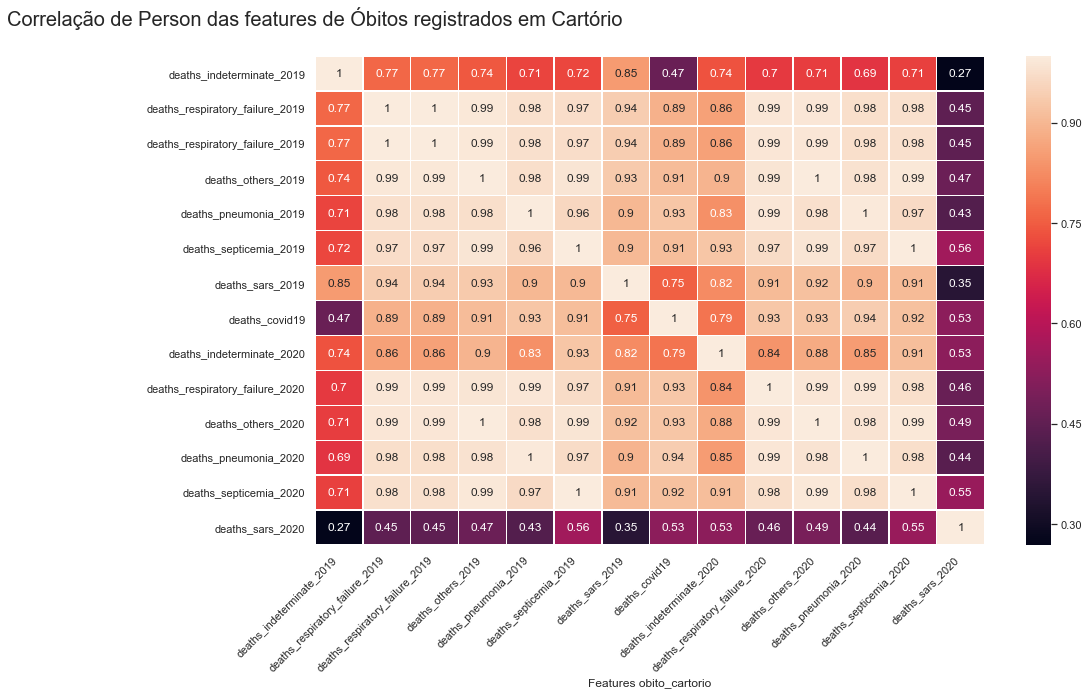

In [278]:
# Correlação entre as features de dados de óbitos registrados em cartório
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="white")

features = df_obito_cartorio.select("deaths_indeterminate_2019","deaths_respiratory_failure_2019","deaths_respiratory_failure_2019","deaths_others_2019","deaths_pneumonia_2019","deaths_septicemia_2019","deaths_sars_2019","deaths_covid19","deaths_indeterminate_2020","deaths_respiratory_failure_2020","deaths_others_2020","deaths_pneumonia_2020","deaths_septicemia_2020","deaths_sars_2020")
d=features.toPandas()

# Calcular a correlação
corr = d.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))
plt.title('Correlação de Person das features de Óbitos registrados em Cartório', y=1.05, size=20,  x=0)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

plt.xlabel('Features obito_cartorio')
plt.xticks(rotation=45, ha='right')

# Snippet para corrigir a visualização do heatmap do Seaborn, que corta a imagem:
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

# Garbage collection
del features
del corr

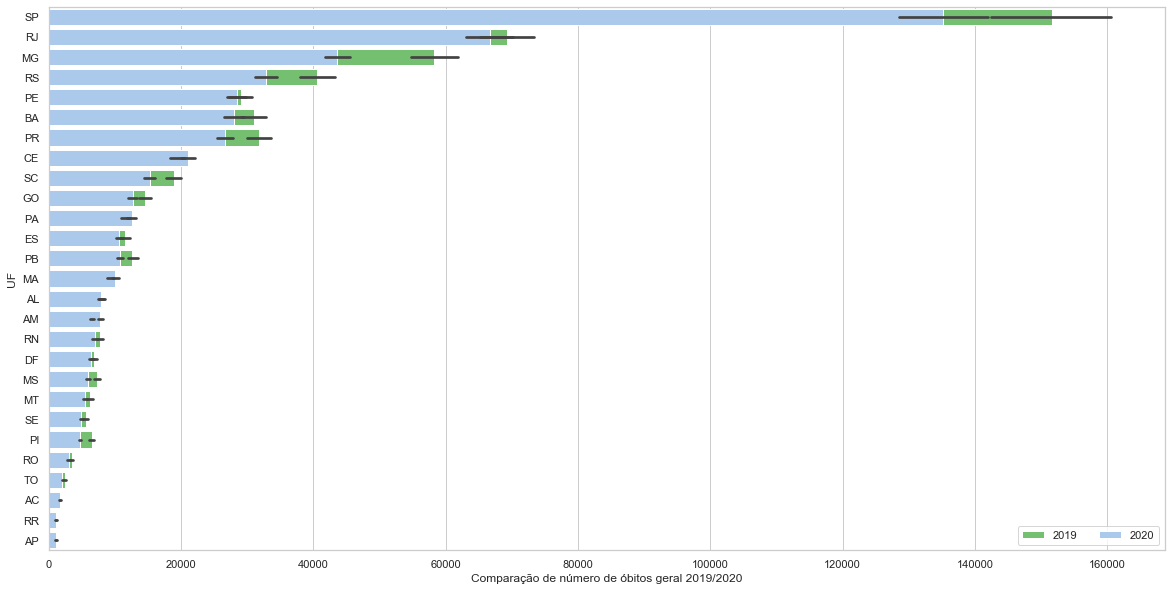

In [94]:
# Gráfico comparando óbitos por causa em 2019 e 2020

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(20, 10))

df_obito_cartorio_pandas= df_obito_cartorio.select("state","deaths_total_2019","deaths_total_2020").toPandas()
deaths = df_obito_cartorio_pandas.sort_values("deaths_total_2020", ascending=False)

sns.set_color_codes("muted")
sns.barplot(x="deaths_total_2019", y="state", data=deaths,
            label="2019", color="g")

sns.set_color_codes("pastel")
sns.barplot(x="deaths_total_2020", y="state", data=deaths,
            label="2020", color="b")


ax.legend(ncol=2, loc="lower right", frameon=True)
plt.ylabel('UF')
plt.xlabel('Comparação de número de óbitos geral 2019/2020')

# Garbage collection
del df_obito_cartorio_pandas
del deaths

In [281]:
df_obitos = getData("SELECT state, SUM(deaths_total_2019) AS deaths_total_2019, SUM(deaths_total_2020) AS deaths_total_2020 FROM obito_cartorio  GROUP BY state")
df_obitos.show(df_obitos.count())

del df_obitos




+-----+-----------------+-----------------+
|state|deaths_total_2019|deaths_total_2020|
+-----+-----------------+-----------------+
|   AC|           619002|           654247|
|   AL|          2929185|          2921524|
|   AM|          2396946|          2861952|
|   AP|           459380|           397248|
|   BA|         11340197|         10274897|
|   CE|          7153920|          7714872|
|   DF|          2523955|          2368193|
|   ES|          4212559|          3922784|
|   GO|          5329516|          4653310|
|   MA|          3397711|          3675762|
|   MG|         21342526|         15961715|
|   MS|          2693353|          2199314|
|   MT|          2288072|          2026847|
|   PA|          4246467|          4596899|
|   PB|          4642250|          3949074|
|   PE|         10653927|         10401459|
|   PI|          2384712|          1739603|
|   PR|         11651631|          9767316|
|   RJ|         25357012|         24409678|
|   RN|          2831787|       

Estes números não fazem sentido devido a forma como os dados são gravados e não podem ser analisados desta forma. Isso também é uma conclusão baseado na própria informação.
Analisando o dado melhor, cada linha contém os dados acumulados do ano até a aquela data, então é preciso buscar os dados baseados em uma data específica para efeito de comparação correta.


In [282]:
# Agora analisandos os óbitos registrados acumulados até 03/08/2020

df_obitos = getData("SELECT state, SUM(deaths_total_2019) AS deaths_total_2019, SUM(deaths_total_2020) AS deaths_total_2020 FROM obito_cartorio WHERE date='2020-08-03' GROUP BY state ORDER BY deaths_total_2020 DESC")
df_obitos.show(df_obitos.count())



+-----+-----------------+-----------------+
|state|deaths_total_2019|deaths_total_2020|
+-----+-----------------+-----------------+
|   SP|           181430|           195112|
|   RJ|            82581|            95854|
|   MG|            69948|            57861|
|   RS|            47989|            47331|
|   PE|            34549|            40931|
|   BA|            36820|            40508|
|   PR|            37956|            38119|
|   CE|            23514|            30522|
|   SC|            22348|            21884|
|   GO|            17395|            18409|
|   PA|            13582|            17882|
|   ES|            13679|            15646|
|   PB|            15184|            15499|
|   MA|            11119|            14494|
|   AL|             9448|            11561|
|   AM|             7754|            11188|
|   RN|             9287|            10017|
|   DF|             8112|             9579|
|   MS|             8781|             8534|
|   MT|             7390|       

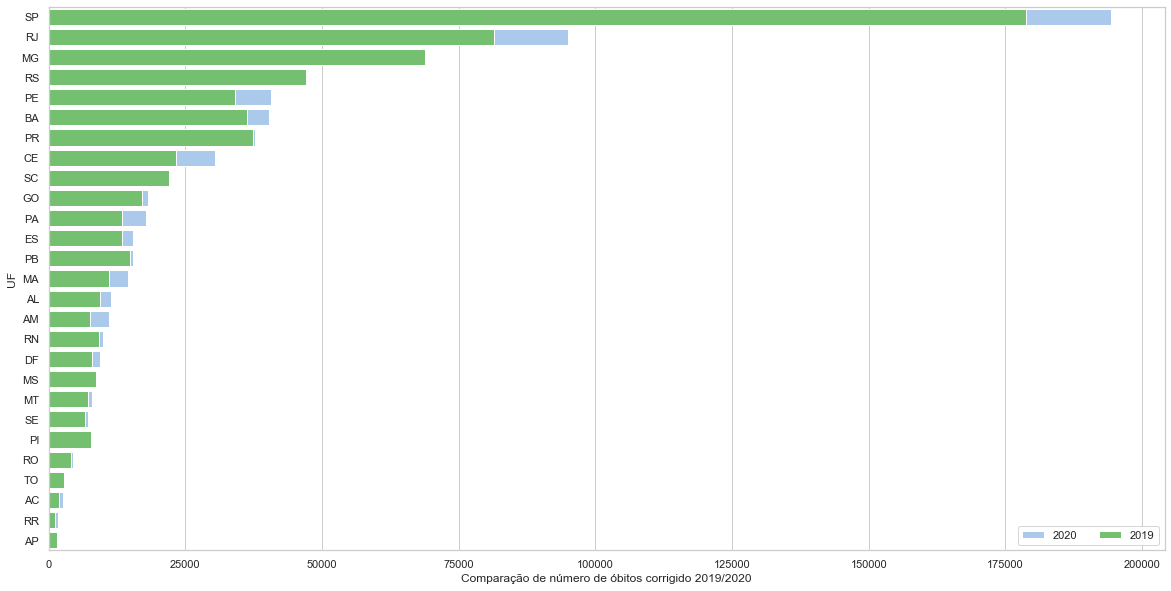

In [119]:
sns.set(style="whitegrid")

df_obitos = df_obitos.toPandas()

f, ax = plt.subplots(figsize=(20, 10))


sns.set_color_codes("pastel")
sns.barplot(x="deaths_total_2020", y="state", data=df_obitos,
            label="2020", color="b")
            
sns.set_color_codes("muted")
sns.barplot(x="deaths_total_2019", y="state", data=df_obitos,
            label="2019", color="g")



ax.legend(ncol=2, loc="lower right", frameon=True)
plt.ylabel('UF')
plt.xlabel('Comparação de número de óbitos corrigido 2019/2020')

# Garbage collection
del df_obitos

### Tabela caso_full

In [299]:
df_caso_full = getData("caso_full")
df_caso_full.toPandas().describe()

,id,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_deaths,order_for_place,new_confirmed,new_deaths
count,509888.000000,509888.000000,5.098880e+05,509888.0,509888.0,509888.000000,509888.000000,509888.000000,509888.000000,509888.000000,509888.000000
mean,254944.500000,25.419745,1.161121e+05,1.0,1.0,494.337607,425.646639,20.348292,51.048336,11.801851,0.394143
std,147192.131365,4.700885,1.136615e+06,0.0,0.0,6310.257733,742.618472,310.957059,32.857230,146.161054,5.478257
min,1.000000,9.000000,0.000000e+00,1.0,1.0,0.000000,0.000000,0.000000,1.000000,-1578.000000,-82.000000
25%,127472.750000,22.000000,6.788000e+03,1.0,1.0,4.000000,30.853310,0.000000,24.000000,0.000000,0.000000
50%,254944.500000,26.000000,1.514900e+04,1.0,1.0,19.000000,144.372135,0.000000,47.000000,0.000000,0.000000
75%,382416.250000,29.000000,3.387000e+04,1.0,1.0,97.000000,508.756988,2.000000,75.000000,2.000000,0.000000
max,509888.000000,33.000000,4.591905e+07,1.0,1.0,627126.000000,15730.064450,25114.000000,167.000000,19030.000000,434.000000


### Tabela caso

In [300]:

df_caso = getData("caso")
df_caso.toPandas().describe()

,id,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
count,490200.000000,490200.000000,490200.000000,490200.000000,490200.0,4.902000e+05,4.902000e+05,490200.000000,490200.000000
mean,245100.500000,498.574270,20.625486,49.484241,1.0,1.176923e+05,3.157934e+06,415.892427,0.044846
std,141508.695315,6395.058198,314.920063,32.063860,0.0,1.148821e+06,1.039891e+06,736.126739,0.123584
min,1.000000,0.000000,0.000000,1.000000,1.0,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,122550.750000,4.000000,0.000000,23.000000,1.0,6.878000e+03,2.414704e+06,29.595675,0.000000
50%,245100.500000,19.000000,0.000000,46.000000,1.0,1.531700e+04,3.137502e+06,137.582400,0.000000
75%,367650.250000,95.000000,2.000000,72.000000,1.0,3.414600e+04,4.110052e+06,489.654035,0.039000
max,490200.000000,627126.000000,25114.000000,165.000000,1.0,4.591905e+07,5.300108e+06,15730.064450,1.000000


In [301]:
# Garbate collection
del df_boletim
del df_caso
del df_caso_full
del df_estimativa_dou_2019
del df_obito_cartorio

## 4) (30%) Análise
Com seu dado pronto, é hora de fazer a parte mais legal: investigar e responder nossas hipoteses. Elas se confirmam? Em quais cenários? Existe alguma forma de perceber isso no mundo real? Dica: Abuse das técnicas de visualização.



## Checagem dos dados da tabela caso

Verificando se a população apresentada na tabela corresponde à tabela do IBGE, usando como link o campo city_ibge_code

Algumas considerações:
- Devem ser considerados apenas os municípios, os estados não (place_type=city)
- O código do município na tabela caso está concatenada com o código da UF do IBGE. Por exemplo, Belo Horizonte tem o código 6200, mas na tabela caso está como 3106200
- Para solucionar este problema e ter performance nos resultados, criei uma nova coluna na tabela:
```
ALTER TABLE `covid19`.`estimativa_dou_2019` 
ADD COLUMN `CODIBGE` int(11) NULL AFTER `POPULACAO`
ADD INDEX(`CODIBGE`);
```
- Preparei um UPDATE:
```
UPDATE estimativa_dou_2019 SET CODIBGE =  CONCAT(CODDUF,LPAD(CODMUNIC,5,'0'));
```
- E há casos com código 0 que devem ser desprezados, pois significam "Importados/Indefinidos", foram declarados nos boletins das Secretarias de Estado mas só contam para o total do estado, sem poder verificar o município. Há 2.220 registros nesta situação.


In [130]:
df_consistency = getData("SELECT DISTINCT c.city_ibge_code, c.city, c.state, c.estimated_population_2019, e.POPULACAO FROM caso c LEFT JOIN estimativa_dou_2019 e ON e.CODIBGE = c.city_ibge_code WHERE c.place_type = 'city' AND city_ibge_code!=0 AND (c.city_ibge_code NOT IN (SELECT DISTINCT CODIBGE FROM estimativa_dou_2019 e) OR c.estimated_population_2019 != e.POPULACAO)")

df_consistency.show(df_consistency.count())

del df_consistency

+--------------+--------------------+-----+-------------------------+---------+
|city_ibge_code|                city|state|estimated_population_2019|POPULACAO|
+--------------+--------------------+-----+-------------------------+---------+
|       2301901|            Barbalha|   CE|                    60781|    59732|
|       2308401|        Missão Velha|   CE|                    35393|    36442|
|       2901205|               Anagé|   BA|                    22005|    17857|
|       2905156|            Caetanos|   BA|                    14542|    15573|
|       2933307|Vitória da Conquista|   BA|                   338480|   341597|
|       3135357|            Japonvar|   MG|                     7969|     8134|
|       3138658|              Lontra|   MG|                     9661|     9496|
|       3300233|  Armação dos Búzios|   RJ|                    33870|    40532|
|       3300704|           Cabo Frio|   RJ|                   226525|   219863|
+--------------+--------------------+---

Apenas estas 9 cidades estão com a população ligeiramente diferente da tabela do IBGE e todas as cidades em "caso" existem na tabela do IBGE, não influenciando significativamente o resultado, diferença aceitável.

In [150]:
from pyspark.sql.functions import col


df_check_panorama = getData("SELECT SUM(confirmed) AS casos_confirmados, SUM(deaths) AS obitos_confirmados, COUNT(0) AS municipios_atingidos, SUM(estimated_population_2019) AS populacao  FROM caso WHERE date = '2020-08-07' AND state='MG' and place_type = 'city'")
df_check_panorama=df_check_panorama.withColumn("taxa_mortalidade",col("obitos_confirmados")/col("populacao")*100)
df_check_panorama=df_check_panorama.withColumn("confirmados_100K",col("casos_confirmados")/col("populacao")*100000)
df_check_panorama=df_check_panorama.withColumn("obitos_100K",col("obitos_confirmados")/col("populacao")*100000)
df_check_panorama=df_check_panorama.withColumn("letalidade",col("obitos_100K")/col("confirmados_100K")*100)

print("Panorama Covid19 em MG até 07/08/2020")
df_check_panorama.show(df_check_panorama.count())

del df_check_panorama

Panorama Covid19 em MG até 07/08/2020
+-----------------+------------------+--------------------+---------+----------------+----------------+-----------+----------+
|casos_confirmados|obitos_confirmados|municipios_atingidos|populacao|taxa_mortalidade|confirmados_100K|obitos_100K|letalidade|
+-----------------+------------------+--------------------+---------+----------------+----------------+-----------+----------+
|           147323|              3381|                 820| 21028009|        0.016100|      700.600000|  16.100000|  2.298000|
+-----------------+------------------+--------------------+---------+----------------+----------------+-----------+----------+



In [180]:
# A partir desta ideia, montei um panorama de letalidade por estado

df_check_panorama = getData("SELECT state, SUM(confirmed) AS casos_confirmados, SUM(deaths) AS obitos_confirmados, COUNT(0) AS municipios_atingidos, SUM(estimated_population_2019) AS populacao  FROM caso WHERE date = '2020-08-07'  and place_type = 'city' GROUP BY state")
df_check_panorama=df_check_panorama.withColumn("taxa_mortalidade",col("obitos_confirmados")/col("populacao")*100)
df_check_panorama=df_check_panorama.withColumn("confirmados_100K",col("casos_confirmados")/col("populacao")*100000)
df_check_panorama=df_check_panorama.withColumn("obitos_100K",col("obitos_confirmados")/col("populacao")*100000)
df_check_panorama=df_check_panorama.withColumn("letalidade",col("obitos_100K")/col("confirmados_100K")*100)


print("Panorama Covid19 BRASIL até 07/08/2020")
df_check_panorama.orderBy("letalidade", ascending=False).show(df_check_panorama.count())



Panorama Covid19 BRASIL até 07/08/2020
+-----+-----------------+------------------+--------------------+---------+----------------+----------------+-----------+----------+
|state|casos_confirmados|obitos_confirmados|municipios_atingidos|populacao|taxa_mortalidade|confirmados_100K|obitos_100K|letalidade|
+-----+-----------------+------------------+--------------------+---------+----------------+----------------+-----------+----------+
|   RJ|           175696|             14028|                  93| 17264943|        0.081300|     1017.600000|  81.300000|  7.989400|
|   PE|           102872|              6867|                 186|  9557071|        0.071900|     1076.400000|  71.900000|  6.679700|
|   CE|           186563|              7946|                 185|  9132078|        0.087000|     2042.900000|  87.000000|  4.258700|
|   PA|           167099|              5871|                 145|  8602865|        0.068200|     1942.400000|  68.200000|  3.511100|
|   ES|            89923|     

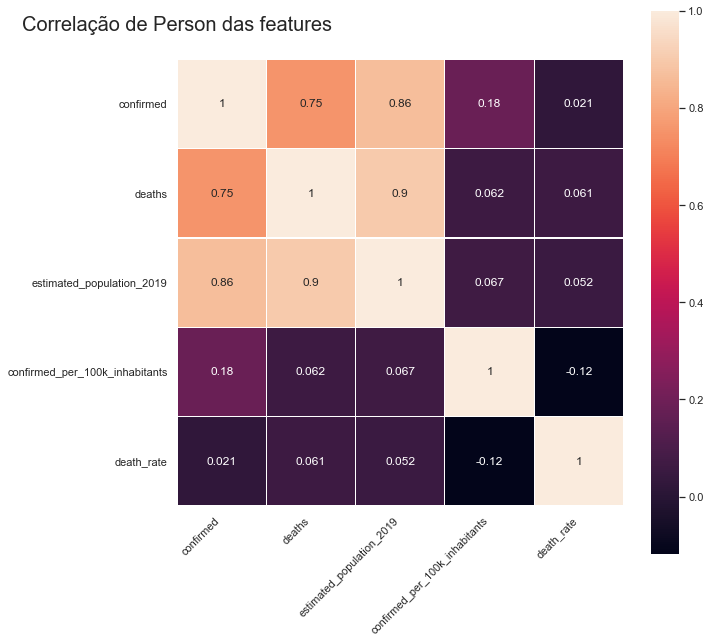

In [280]:
df_check = getData("SELECT state,confirmed,deaths,estimated_population_2019,confirmed_per_100k_inhabitants,death_rate FROM caso WHERE date='2020-08-07' AND place_type='city'").toPandas()
corr = df_check.corr()

plt.figure(figsize=(10, 10))
plt.title('Correlação de Person das features', y=1.05, size=20,  x=0)
sns.heatmap(corr, linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True)
plt.xticks(rotation=45, ha='right')

# Snippet para corrigir a visualização do heatmap do Seaborn, que corta a imagem:
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

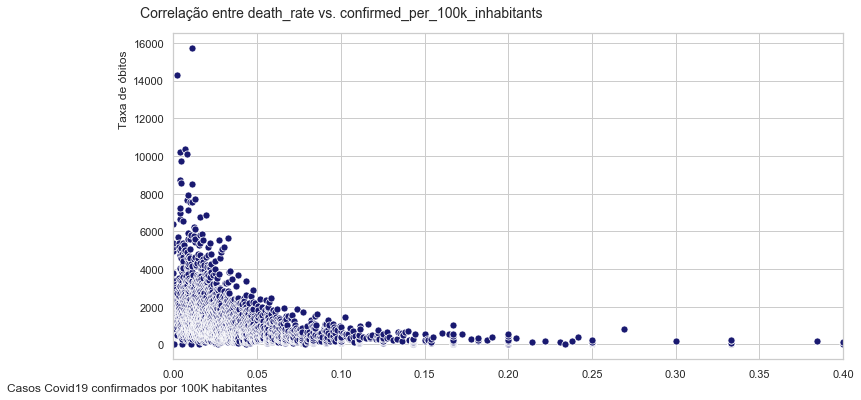

In [234]:
plt.rcParams['figure.figsize'] = [12, 6]

ordered = df_check[['death_rate', 'confirmed_per_100k_inhabitants']].sort_values(by=['death_rate', 'confirmed_per_100k_inhabitants'])    
sns.scatterplot(x='death_rate', y='confirmed_per_100k_inhabitants', data=ordered, color='#191970', s=50)

plt.title('Correlação entre death_rate vs. confirmed_per_100k_inhabitants', y=1.03, size=14, loc='left', x=-0.05)
plt.ylabel('Taxa de óbitos', horizontalalignment='left', y=0.71)
plt.xlabel('Casos Covid19 confirmados por 100K habitantes', horizontalalignment='right', x=0.14)
plt.xlim(0,0.4)
plt.show()

In [226]:
# Dataset final do acumulado do último dia com dados
df = getData("SELECT * FROM caso WHERE date='2020-08-07' AND place_type='city'").toPandas()
df

,id,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,149,2020-08-07,AC,Acrelândia,city,299,7,127,1,15256,1200013,1959.88464,0.0234
1,278,2020-08-07,AC,Assis Brasil,city,383,8,94,1,7417,1200054,5163.81299,0.0209
2,374,2020-08-07,AC,Brasiléia,city,871,12,86,1,26278,1200104,3314.55981,0.0138
3,462,2020-08-07,AC,Bujari,city,334,5,117,1,10266,1200138,3253.45801,0.0150
4,581,2020-08-07,AC,Capixaba,city,230,7,87,1,11733,1200179,1960.28296,0.0304
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280,427897,2020-08-07,RS,Vitória das Missões,city,2,0,67,1,3133,4323754,63.83658,0.0000
4281,427966,2020-08-07,RS,Westfália,city,61,0,96,1,3014,4323770,2023.88855,0.0000
4282,428064,2020-08-07,RS,Xangri-lá,city,62,3,102,1,16408,4323804,377.86447,0.0484
4283,428168,2020-08-07,RS,Água Santa,city,73,0,92,1,3748,4300059,1947.70544,0.0000


In [53]:
# Fechamento da conexão com o banco de dados
spark.stop()